In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the list of ticker symbols for the companies
ticker_symbols = ['NKE', 'GS', 'JNJ', 'PFE', 'JPM']

# Define the start and end dates for the historical data
start_date = '2009-04-05'
end_date = '2022-04-05'

# Fetch the historical stock data for each company
multi_data = yf.download(ticker_symbols, start=start_date, end=end_date)
print(multi_data.head)

# Combine the stock data into a single DataFrame
stock_df = pd.DataFrame(multi_data)

# Print the first few rows of the combined DataFrame
stock_df.head()
stock_df.info()

[*********************100%%**********************]  5 of 5 completed

<bound method NDFrame.head of Price        Adj Close                                                 \
Ticker              GS         JNJ         JPM         NKE        PFE   
Date                                                                    
2009-04-06   90.748940   33.579365   19.337660   10.655685   7.365043   
2009-04-07   90.305489   33.039013   18.686211   10.362638   7.257601   
2009-04-08   89.270798   33.096920   18.809643   10.441620   7.241487   
2009-04-09   96.723648   33.071171   22.457739   11.071355   7.279088   
2009-04-13  101.251328   32.903927   23.109192   11.040182   7.241487   
...                ...         ...         ...         ...        ...   
2022-03-29  320.383331  167.893234  132.105423  135.729446  48.505589   
2022-03-30  316.544312  169.640747  131.506561  135.144165  48.229671   
2022-03-31  311.365906  167.411499  127.557831  131.261734  47.613464   
2022-04-01  311.479065  168.318298  126.612755  130.247223  47.429523   
2022-04-04  309.58309

In [2]:
#Creating new variables
# Calculate H-L (High minus Low price)
stock_df[('H-L','GS')] = stock_df.iloc[:,10] - stock_df.iloc[:,15]
stock_df[('H-L','JNJ')] = stock_df.iloc[:,11] - stock_df.iloc[:,16]
stock_df[('H-L','JPM')] = stock_df.iloc[:,12] - stock_df.iloc[:,17]
stock_df[('H-L','NKE')] = stock_df.iloc[:,13] - stock_df.iloc[:,18]
stock_df[('H-L','PFE')] = stock_df.iloc[:,14] - stock_df.iloc[:,19]

# Calculate O-C (Close minus Open price)
stock_df[('O-C','GS')] = stock_df.iloc[:,20] - stock_df.iloc[:,5]
stock_df[('O-C','JNJ')] = stock_df.iloc[:,21] - stock_df.iloc[:,6]
stock_df[('O-C','JPM')] = stock_df.iloc[:,22] - stock_df.iloc[:,7]
stock_df[('O-C','NKE')] = stock_df.iloc[:,23] - stock_df.iloc[:,8]
stock_df[('O-C','PFE')] = stock_df.iloc[:,24] - stock_df.iloc[:,9]


# Calculate the 7-day moving average
stock_df[('7 MA','GS')] = stock_df[('Close','GS')].rolling(window=7).mean()
stock_df[('7 MA','JNJ')] = stock_df[('Close','JNJ')].rolling(window=7).mean()
stock_df[('7 MA','JPM')] = stock_df[('Close','JPM')].rolling(window=7).mean()
stock_df[('7 MA','NKE')] = stock_df[('Close','NKE')].rolling(window=7).mean()
stock_df[('7 MA','PFE')] = stock_df[('Close','PFE')].rolling(window=7).mean()

# Calculate the 14-day moving average
stock_df[('14 MA','GS')] = stock_df[('Close','GS')].rolling(window=14).mean()
stock_df[('14 MA','JNJ')] = stock_df[('Close','JNJ')].rolling(window=14).mean()
stock_df[('14 MA','JPM')] = stock_df[('Close','JPM')].rolling(window=14).mean()
stock_df[('14 MA','NKE')] = stock_df[('Close','NKE')].rolling(window=14).mean()
stock_df[('14 MA','PFE')] = stock_df[('Close','PFE')].rolling(window=14).mean()


# Calculate the 21-day moving average
stock_df[('21 MA','GS')] = stock_df[('Close','GS')].rolling(window=21).mean()
stock_df[('21 MA','JNJ')] = stock_df[('Close','JNJ')].rolling(window=21).mean()
stock_df[('21 MA','JPM')] = stock_df[('Close','JPM')].rolling(window=21).mean()
stock_df[('21 MA','NKE')] = stock_df[('Close','NKE')].rolling(window=21).mean()
stock_df[('21 MA','PFE')] = stock_df[('Close','PFE')].rolling(window=21).mean()



# Calculate the 7-day SD
stock_df[('7 SD','GS')] = stock_df[('Close','GS')].rolling(window=7).std()
stock_df[('7 SD','JNJ')] = stock_df[('Close','JNJ')].rolling(window=7).std()
stock_df[('7 SD','JPM')] = stock_df[('Close','JPM')].rolling(window=7).std()
stock_df[('7 SD','NKE')] = stock_df[('Close','NKE')].rolling(window=7).std()
stock_df[('7 SD','PFE')] = stock_df[('Close','PFE')].rolling(window=7).std()


# Print the first few rows of the updated DataFrame with the new variables
print(stock_df.head(25))
stock_df.info()

Price        Adj Close                                                  Close  \
Ticker              GS        JNJ        JPM        NKE       PFE          GS   
Date                                                                            
2009-04-06   90.748940  33.579365  19.337660  10.655685  7.365043  116.650002   
2009-04-07   90.305489  33.039013  18.686211  10.362638  7.257601  116.080002   
2009-04-08   89.270798  33.096920  18.809643  10.441620  7.241487  114.750000   
2009-04-09   96.723648  33.071171  22.457739  11.071355  7.279088  124.330002   
2009-04-13  101.251328  32.903927  23.109192  11.040182  7.241487  130.149994   
2009-04-14   89.550858  33.045441  21.051994  10.682708  7.166279  115.110001   
2009-04-15   94.280846  33.302765  22.327457  10.830272  7.445623  121.190002   
2009-04-16   94.280846  33.579365  22.793755  11.175279  7.467110  121.190002   
2009-04-17   93.821846  34.126160  22.807463  11.349861  7.606784  120.599998   
2009-04-20   89.473038  33.7

In [3]:
#subsetting the required columns
columns_to_drop = [('Adj Close', 'GS'),('Adj Close', 'JNJ'),('Adj Close', 'JPM'),('Adj Close', 'NKE'),('Adj Close', 'PFE'),
                  ('High', 'GS'),('High', 'JNJ'),('High', 'JPM'),('High', 'NKE'),('High', 'PFE'),
                  ('Low', 'GS'),('Low', 'JNJ'),('Low', 'JPM'),('Low', 'NKE'),('Low', 'PFE'),
                  ('Open', 'GS'),('Open', 'JNJ'),('Open', 'JPM'),('Open', 'NKE'),('Open', 'PFE')]  # List of columns to drop
stock_df.drop(columns=columns_to_drop, inplace=True)

In [4]:
# Define the start and end dates for the train and test data
train_start_date = '2009-05-05'
train_end_date = '2020-01-31'
test_start_date = '2020-02-03'
test_end_date = '2022-04-05'

# Split the DataFrame into train and test data based on the dates
train_data = stock_df.loc[train_start_date:train_end_date]
test_data = stock_df.loc[test_start_date:test_end_date]

# Print the shapes of the train and test data
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

stock_df.info()

Train data shape: (2705, 40)
Test data shape: (548, 40)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3273 entries, 2009-04-06 to 2022-04-04
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, GS)    3273 non-null   float64
 1   (Close, JNJ)   3273 non-null   float64
 2   (Close, JPM)   3273 non-null   float64
 3   (Close, NKE)   3273 non-null   float64
 4   (Close, PFE)   3273 non-null   float64
 5   (Volume, GS)   3273 non-null   int64  
 6   (Volume, JNJ)  3273 non-null   int64  
 7   (Volume, JPM)  3273 non-null   int64  
 8   (Volume, NKE)  3273 non-null   int64  
 9   (Volume, PFE)  3273 non-null   int64  
 10  (H-L, GS)      3273 non-null   float64
 11  (H-L, JNJ)     3273 non-null   float64
 12  (H-L, JPM)     3273 non-null   float64
 13  (H-L, NKE)     3273 non-null   float64
 14  (H-L, PFE)     3273 non-null   float64
 15  (O-C, GS)      3273 non-null   float64
 16  (O-C, JNJ)     3273 no

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'stock_df' is your DataFrame containing the provided variables
train_start_date = '2009-05-05'
train_end_date = '2020-01-31'
test_start_date = '2020-02-03'
test_end_date = '2022-04-05'

# Filter the DataFrame based on the specified dates
train_data = stock_df[(stock_df.index >= train_start_date) & (stock_df.index <= train_end_date)]
test_data = stock_df[(stock_df.index >= test_start_date) & (stock_df.index <= test_end_date)]
tkr = ['GS', 'JNJ', 'JPM', 'NKE', 'PFE']
ep = [300, 200, 300, 300, 300]

#len(tkr)
for i in range(len(tkr)):
    # Select the features and target variable for train and test data
    train_features = train_data[[('H-L',tkr[i]), ('O-C',tkr[i]), ('7 MA',tkr[i]), ('14 MA',tkr[i]), ('21 MA',tkr[i]), ('7 SD',tkr[i])]]
    train_target = train_data[('Close',tkr[i])]
    test_features = test_data[[('H-L',tkr[i]), ('O-C',tkr[i]), ('7 MA',tkr[i]), ('14 MA',tkr[i]), ('21 MA',tkr[i]), ('7 SD',tkr[i])]]
    test_target = test_data[('Close',tkr[i])]

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(train_features)
    X_test_scaled = scaler.transform(test_features)

    # Build the ANN model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(6, input_dim=6, activation='elu'),
        tf.keras.layers.Dense(3, activation='elu'),
        tf.keras.layers.Dense(1, activation='elu')])
    
    model.compile(optimizer='adam', loss='mean_squared_error')

    # epoch=300 good for all except JNJ
    model.fit(X_train_scaled, train_target, epochs=ep[i], batch_size=32, verbose=0)

    loss = model.evaluate(X_test_scaled, test_target, verbose=0)
    print("Mean Squared Error on Test Data:", loss)

    # Predicting the closing prices
    predictions = model.predict(X_test_scaled)
    
    test_data[('Predicted',tkr[i])] = predictions


C:\Users\debar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error on Test Data: 59.58213424682617
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\debar\AppData\Local\Temp\ipykernel_1940\1312610095.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[('Predicted',tkr[i])] = predictions
C:\Users\debar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error on Test Data: 11.985855102539062
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\debar\AppData\Local\Temp\ipykernel_1940\1312610095.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[('Predicted',tkr[i])] = predictions
C:\Users\debar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error on Test Data: 14.982454299926758
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\debar\AppData\Local\Temp\ipykernel_1940\1312610095.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[('Predicted',tkr[i])] = predictions
C:\Users\debar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error on Test Data: 14.62027359008789
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\debar\AppData\Local\Temp\ipykernel_1940\1312610095.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[('Predicted',tkr[i])] = predictions
C:\Users\debar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error on Test Data: 1.0859885215759277
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\debar\AppData\Local\Temp\ipykernel_1940\1312610095.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[('Predicted',tkr[i])] = predictions


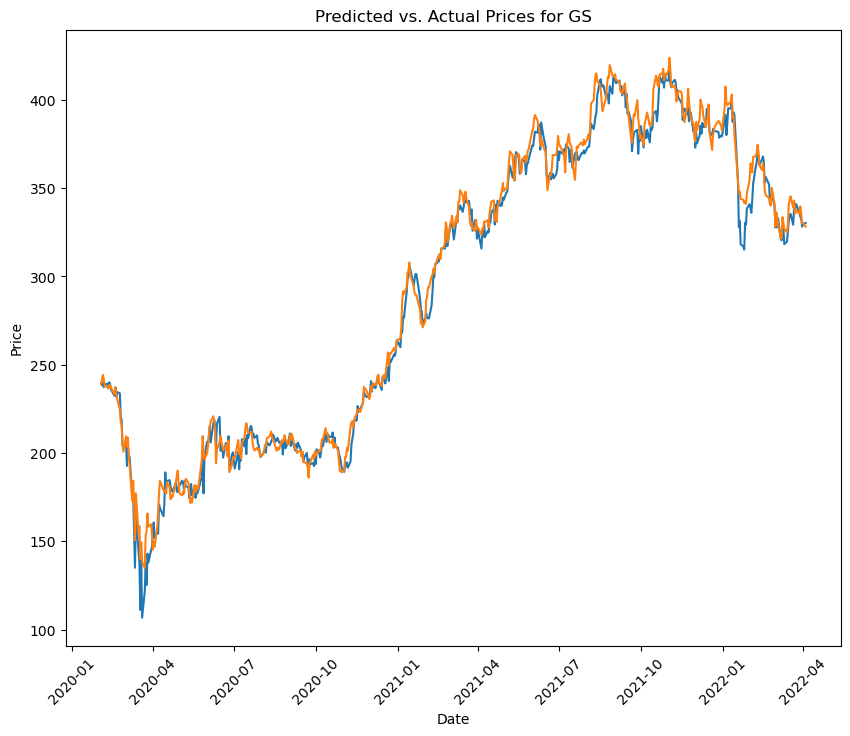

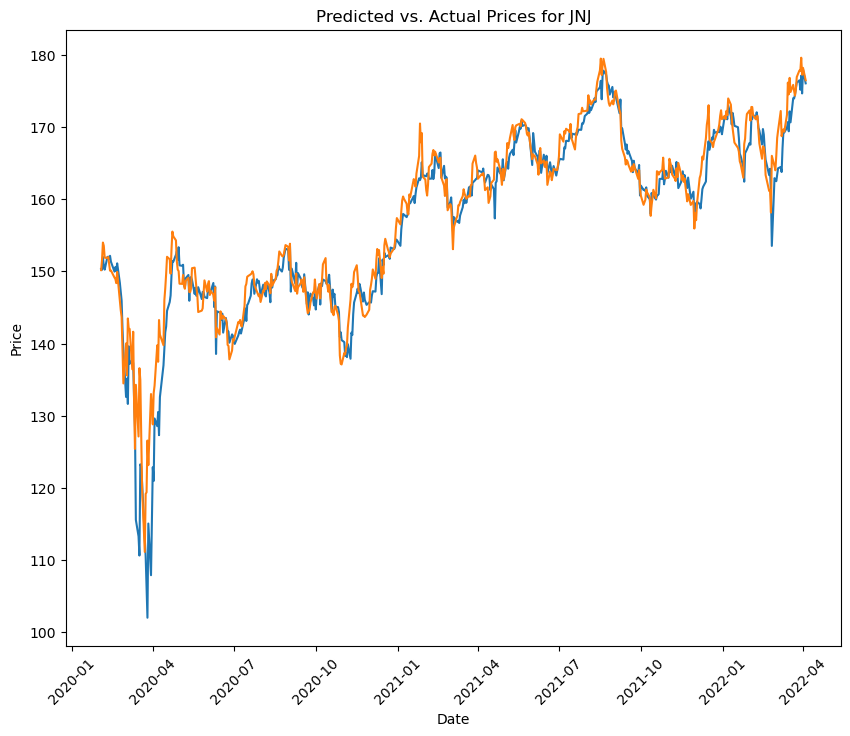

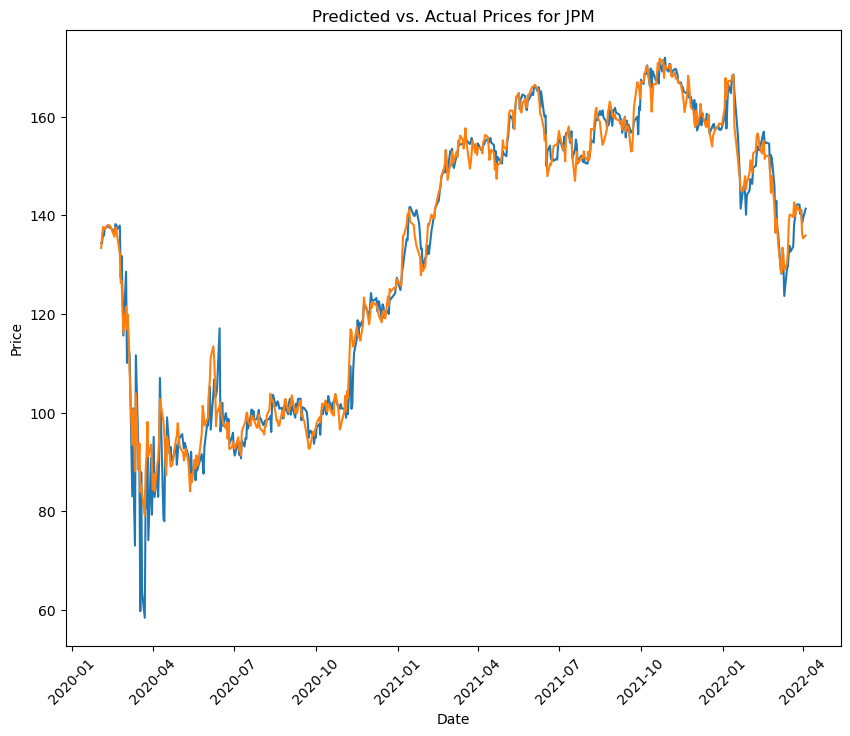

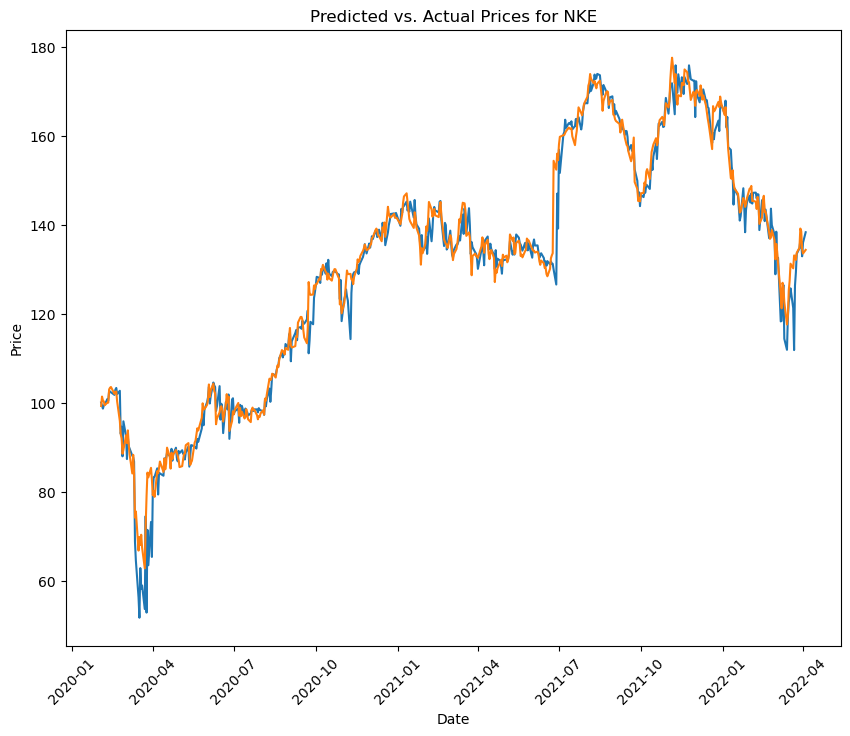

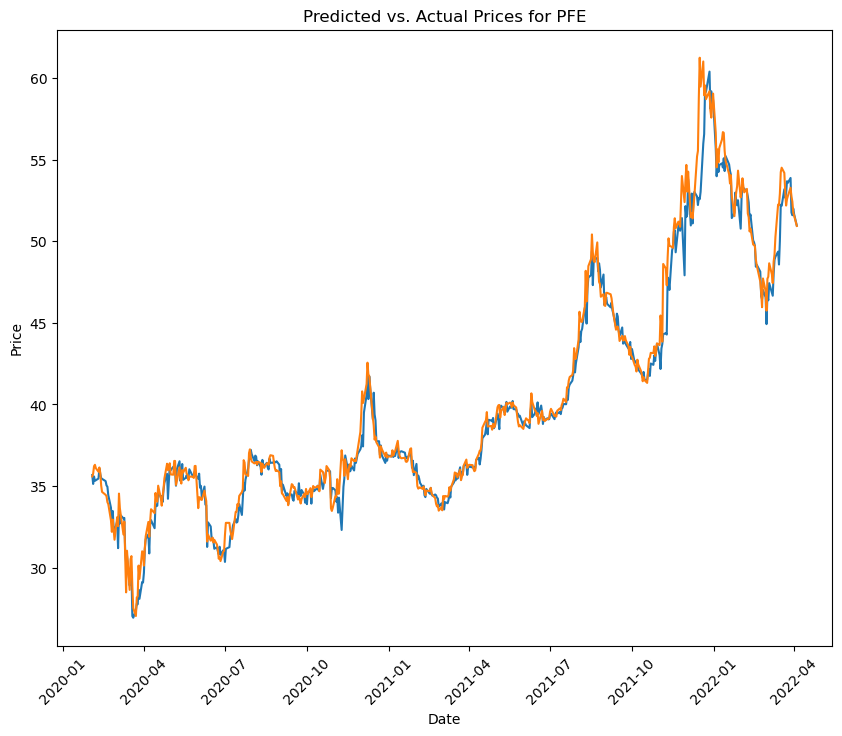

In [23]:
import matplotlib.pyplot as plt
for i in range(len(tkr)):
    plt.figure(figsize=(10, 8))
    plt.plot(test_data[('Predicted', tkr[i])], label='Predicted')
    plt.plot(test_data[('Close', tkr[i])], label='Actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Predicted vs. Actual Prices for {tkr[i]}')
    plt.xticks(rotation=45)
    
    plt.savefig(f'plot_{tkr[i]}_ANN_Extended.jpg')
    plt.show()

In [8]:
rmse,mape,mbe=np.zeros(5),np.zeros(5),np.zeros(5)
tkr = ['GS', 'JNJ', 'JPM', 'NKE', 'PFE']
for i in range(len(tkr)):
    of = test_data[('Close',tkr[i])] - test_data[('Predicted',tkr[i])]
    rmse[i]=np.sqrt(np.sum(of**2)/len(of))
    mape[i]=(np.sum(np.abs(of/test_data[('Close',tkr[i])]))/len(of))*100
    mbe[i]=np.mean(of)
print(rmse)
print(mape)
print(mbe)

[7.90043849 3.52573518 3.88660819 3.87139789 1.06374045]
[2.14358655 1.38986259 2.09700553 1.91556127 1.51295151]
[3.0702659  1.00498767 0.33119087 0.63978721 0.30857229]


In [9]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

train_data1 = stock_df[(stock_df.index >= train_start_date) & (stock_df.index <= train_end_date)]
test_data1 = stock_df[(stock_df.index >= test_start_date) & (stock_df.index <= test_end_date)]
tkr = ['GS', 'JNJ', 'JPM', 'NKE', 'PFE']

for i in range(len(tkr)):
    train_features = train_data1[[('H-L', tkr[i]), ('O-C', tkr[i]), ('7 MA', tkr[i]), ('14 MA', tkr[i]), ('21 MA', tkr[i]), ('7 SD', tkr[i])]]
    train_target = train_data1[('Close', tkr[i])]
    test_features = test_data1[[('H-L', tkr[i]), ('O-C', tkr[i]), ('7 MA', tkr[i]), ('14 MA', tkr[i]), ('21 MA', tkr[i]), ('7 SD', tkr[i])]]
    test_target = test_data1[('Close', tkr[i])]

    rf = RandomForestRegressor(n_estimators=100, max_features=5, max_depth=200).fit(train_features, train_target)
    
    prediction = rf.predict(test_features)
    test_data1[('Predicted', tkr[i])] = prediction


C:\Users\debar\AppData\Local\Temp\ipykernel_1940\40739124.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1[('Predicted', tkr[i])] = prediction
C:\Users\debar\AppData\Local\Temp\ipykernel_1940\40739124.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1[('Predicted', tkr[i])] = prediction
C:\Users\debar\AppData\Local\Temp\ipykernel_1940\40739124.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [10]:
rmse, mape, mbe = np.zeros(5), np.zeros(5), np.zeros(5)
for i in range(len(tkr)):
    of = test_data1[('Close', tkr[i])] - test_data1[('Predicted', tkr[i])]
    rmse[i] = np.sqrt(np.sum(of**2) / len(of))
    mape[i] = (np.sum(np.abs(of / test_data1[('Close', tkr[i])])) / len(of)) * 100
    mbe[i] = np.mean(of)
print(rmse)
print(mape)
print(mbe)

[79.69056937 13.91081055 15.28804484 39.64408076  4.97539243]
[16.29720011  6.79775585  7.76235614 22.3789466   5.57491622]
[56.8692463  10.27225389  9.49989207 31.88580624  2.33080261]


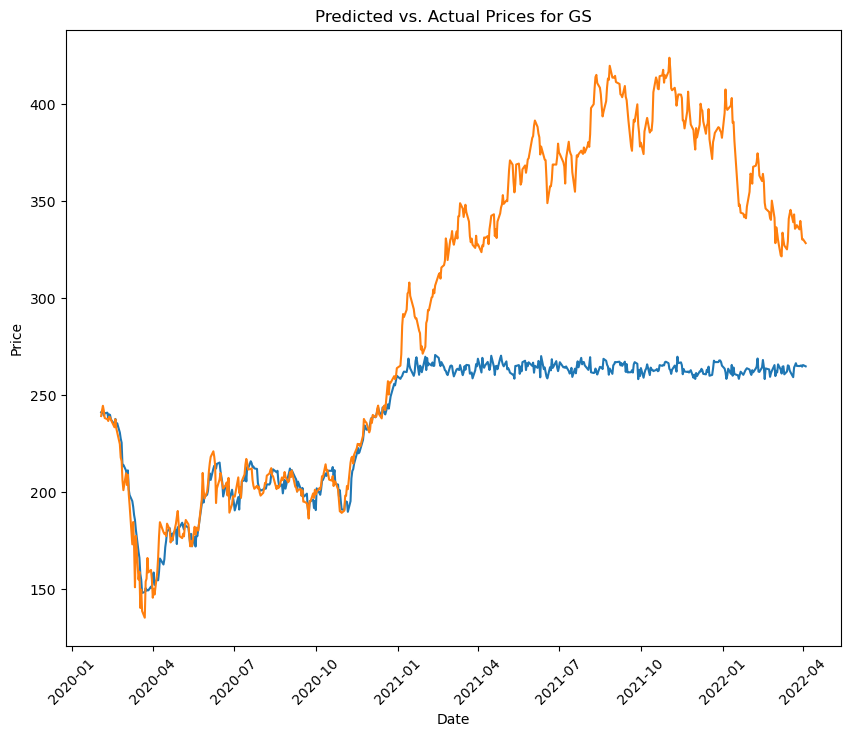

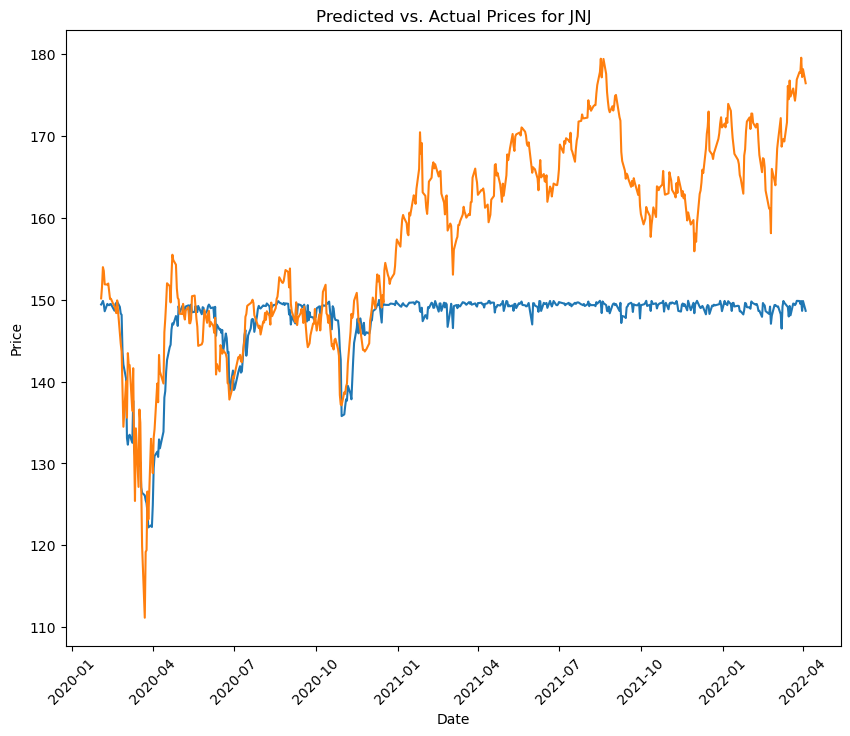

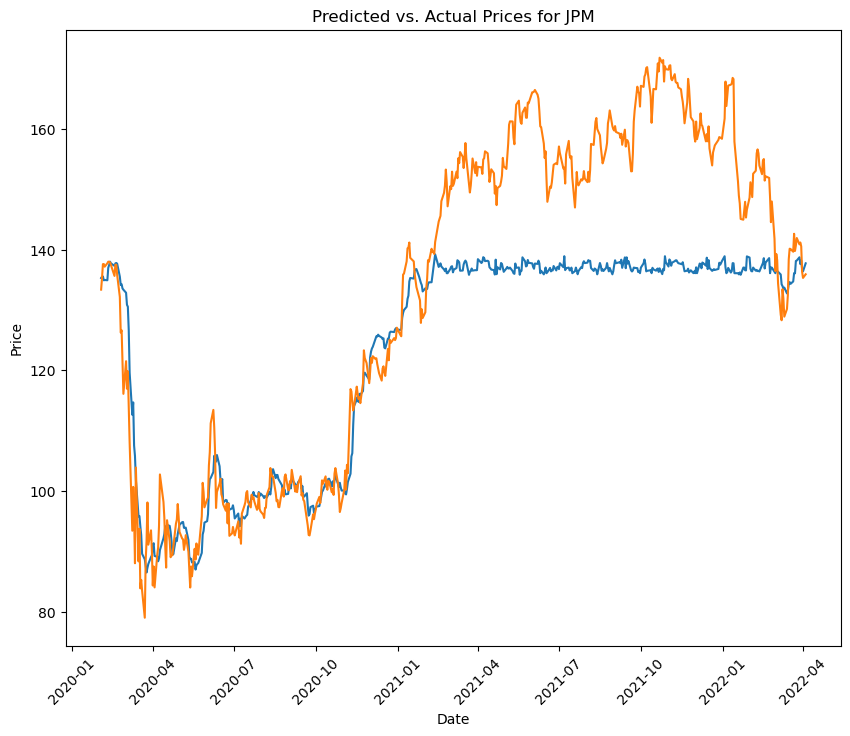

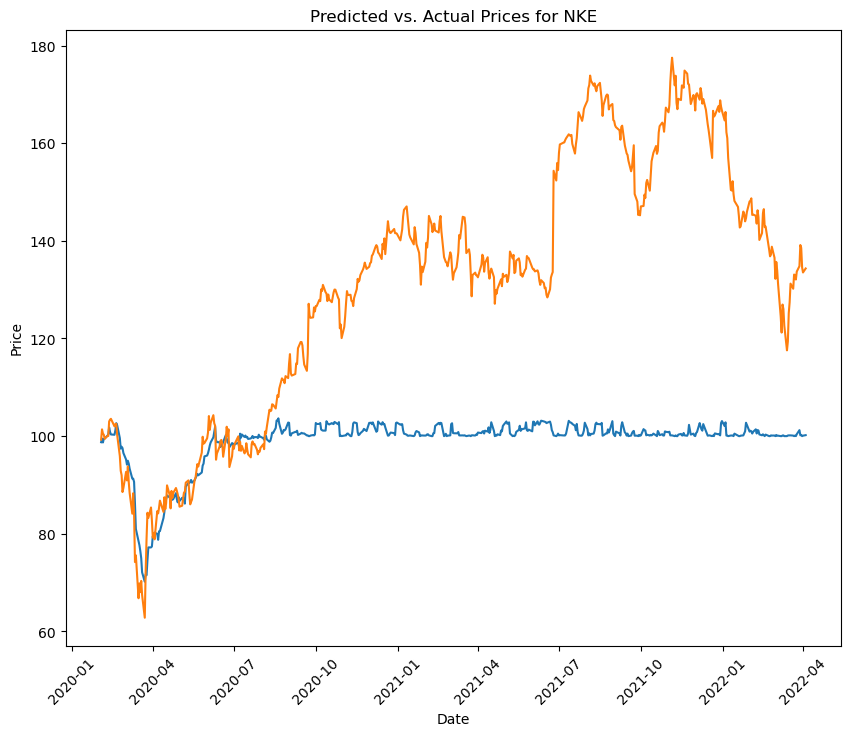

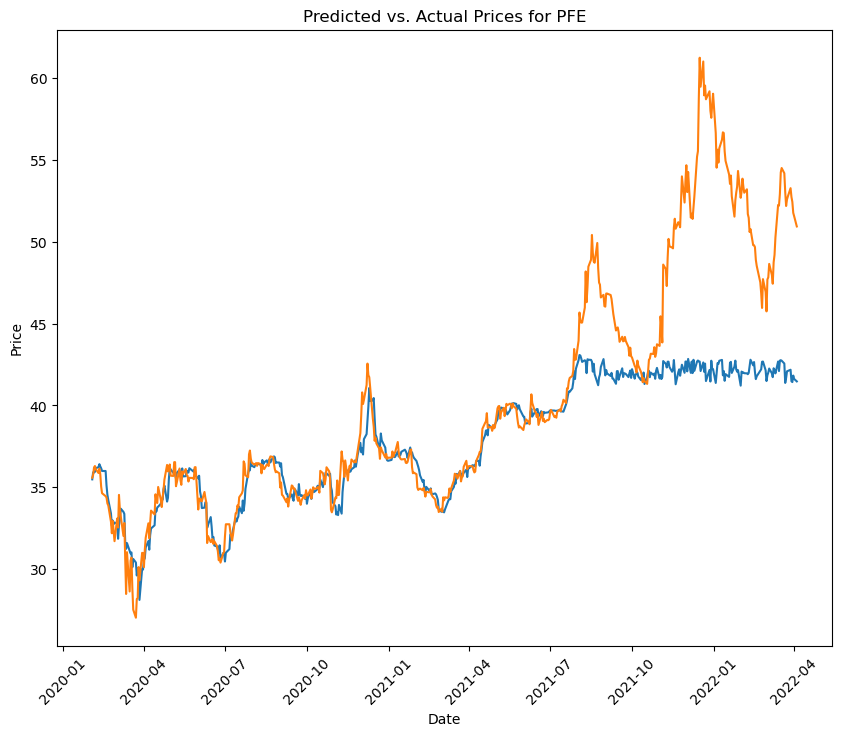

In [24]:
import matplotlib.pyplot as plt
for i in range(len(tkr)):
    plt.figure(figsize=(10, 8))
    plt.plot(test_data1[('Predicted', tkr[i])], label='Predicted')
    plt.plot(test_data1[('Close', tkr[i])], label='Actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Predicted vs. Actual Prices for {tkr[i]}')
    plt.xticks(rotation=45)
    
    plt.savefig(f'plot_{tkr[i]}_RM_Extended.jpg')
    plt.show()